In [512]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [513]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom
from matplotlib import pyplot as plt

# DEFINITIONS

In [514]:
enchanting = pd.read_csv('enchanting.csv')

In [515]:
enchanting.head()

,luck,item,item_level,enchanting_level,result
0,NAN,accessory,0,0,fail
1,NAN,accessory,0,1,fail
2,NAN,accessory,0,2,fail
3,NAN,accessory,0,3,fail
4,NAN,accessory,0,4,fail


In [516]:
levels = range(0,4)
item_levels = range(0,2)

fails = enchanting.result == 'fail'
wins = enchanting.result == 'win'

luck_2 = enchanting.luck == '2'
luck_4 = enchanting.luck == '4'

il = lambda x: enchanting.item_level == x
el = lambda x: enchanting.enchanting_level == x
i = lambda x: enchanting.item == x
l = lambda x: enchanting.luck == x

In [517]:
def ratios(item, item_level, enchanting_level, luck):
    fail = enchanting[i(item)][l(luck)][il(item_level)][el(enchanting_level)]['result'].count()
    win = enchanting[i(item)][l(luck)][il(item_level)][el(enchanting_level)]['result'].count()
    return (win+fail), win*1.0/(win+fail)

In [518]:
def ratios_ignore_luck(item, item_level, enchanting_level):
    fail = enchanting[fails][i(item)][il(item_level)][el(enchanting_level)]['result'].count()
    win = enchanting[wins][i(item)][il(item_level)][el(enchanting_level)]['result'].count()
    if win+fail > 1:
        return item_level, (win+fail), win*1.0/(win+fail)
    elif item_level == 0 and enchanting_level == 0:
        print('Warning'),
        return item_level, (win+fail), .1125
    elif item_level == 0:
        return ratios_ignore_luck(item, item_level, enchanting_level-1)
    else:
        return ratios_ignore_luck(item, item_level-1, enchanting_level)

# KNOWN FACTS

LinregressResult(slope=-0.025000000000000001, intercept=0.40000000000000002, rvalue=-1.0, pvalue=2.5000000000000343e-60, stderr=0.0)


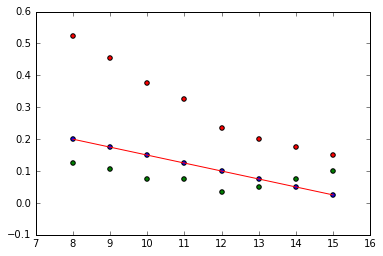

In [519]:
weapon_level = np.arange(8,16)
probabilities =  [.2, .175, .15, .125, .1, .075, .05, .025]
highest_failstacks = [13, 14, 15, 16, 18, 20, 25, 25]
increase = [.025, .02, .015, .0125, .0075,.0063, .005, .005]
result = stats.linregress(weapon_level, probabilities)
print result
scatter(weapon_level, probabilities)
plot(weapon_level, [x*result.slope+result.intercept for x in weapon_level], 'r')
scatter(weapon_level, probabilities + np.multiply(highest_failstacks, increase), c='r')
scatter(weapon_level, np.multiply(highest_failstacks, increase) - probabilities, c='g')

# CALCULATING EXPECTED VALUES

In [520]:
price_accessory = 80
price_accessory_r1 = 150

def plot_weapon_breakpoints(rank):
    price_blackstone = 360*.65

    ev_blackstone = lambda tries, rank: -(-.025*rank + .4+(increase[rank-8]*tries))*price_blackstone
    ev_accessory = lambda tries, rank: (price_blackstone-(price_accessory*(1-ratios_ignore_luck('accessory', 0, tries)[2])))-price_accessory*tries
    ev_accessory_r1 = lambda tries, rank: (price_blackstone-(price_accessory*(1-ratios_ignore_luck('accessory', 1, tries)[2])))-price_accessory_r1*tries

    plot(range(1,tries+1),[ ev_blackstone(x,rank) for x in range(1,tries+1)],c='b')
    plot(range(1,tries+1),[ ev_accessory(x,rank) for x in range(1,tries+1)],c='g')
    plot(range(1,tries+1),[ ev_accessory_r1(x,rank) for x in range(1,tries+1)],c='r')

def plot_armor_breakpoints(rank):
    price_blackstone = 269*.65

    ev_blackstone = lambda tries, rank: -(ratios_ignore_luck('armor',rank,tries))[2]*price_blackstone
    ev_accessory = lambda tries, rank: (price_blackstone-(price_accessory*(1-ratios_ignore_luck('accessory', 0, tries)[2])))-price_accessory*tries
    ev_accessory_r1 = lambda tries, rank: (price_blackstone-(price_accessory*(1-ratios_ignore_luck('accessory', 1, tries)[2])))-price_accessory_r1*tries

    plot(range(1,tries+1),[ ev_blackstone(x,rank) for x in range(1,tries+1)],c='b')
    plot(range(1,tries+1),[ ev_accessory(x,rank) for x in range(1,tries+1)],c='g')
    plot(range(1,tries+1),[ ev_accessory_r1(x,rank) for x in range(1,tries+1)],c='r')
       
    

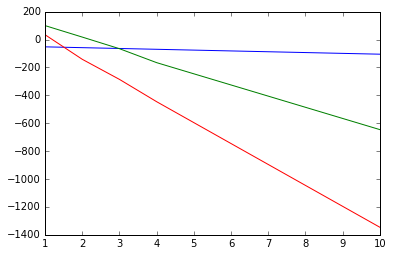

In [521]:
plot_weapon_breakpoints(8)

Warning Warning Warning Warning Warning


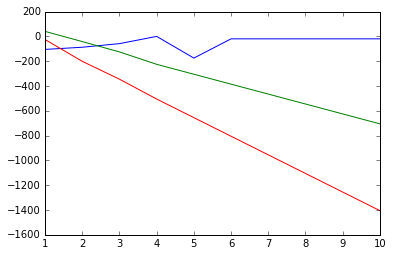

In [522]:
plot_armor_breakpoints(6)

Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning Warning

<Container object of 25 artists>

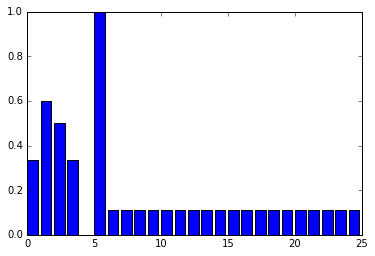

In [523]:
bar(range(0,25),[ratios_ignore_luck('armor',6,x)[2] for x in range(0,25)])

In [554]:
ratios_ignore_luck('accessory',1,4)

(1, 4, 0.0)

### np.mean(probabilities)

In [526]:
ratios_ignore_luck('armor',7,1)

(7, 6, 0.33333333333333331)

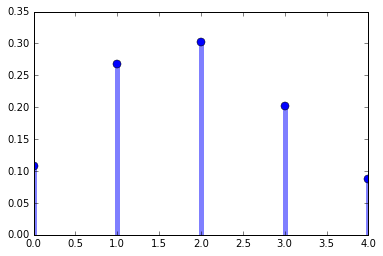

In [527]:
rv = binom(10, .2)

x = np.arange(rv.ppf(0.01), rv.ppf(0.99))
plot(x, rv.pmf(x), 'bo', ms=8, label='binom pmf')
vlines(x, 0, rv.pmf(x), colors='b', lw=5, alpha=0.5)

In [528]:
taxi = lambda km, viagens: viagens*5.02 + 2.51*km
kms = range(1,10000)
viagens = range(1,700)
X, Y = np.meshgrid(kms, viagens)